Импорт нужных модулей

In [119]:
import Detector
import os
import cv2
import sys
import matplotlib.pyplot as plt

Считывание изображения, проверка разрешения изображения:

In [120]:
path = 'input/2.jpg'

if not os.path.exists(path):
    exit("Invalid image path")
img_orig = cv2.imread(path)

b, g, r = cv2.split(img_orig)
img_orig = cv2.merge([r, g, b])

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

if img.shape[0] * img.shape[1] != 4000 * 3000:
    exit("Invalid image resolution")

Сглаживание и бинаризация изображения. Получение контуров белого листа:

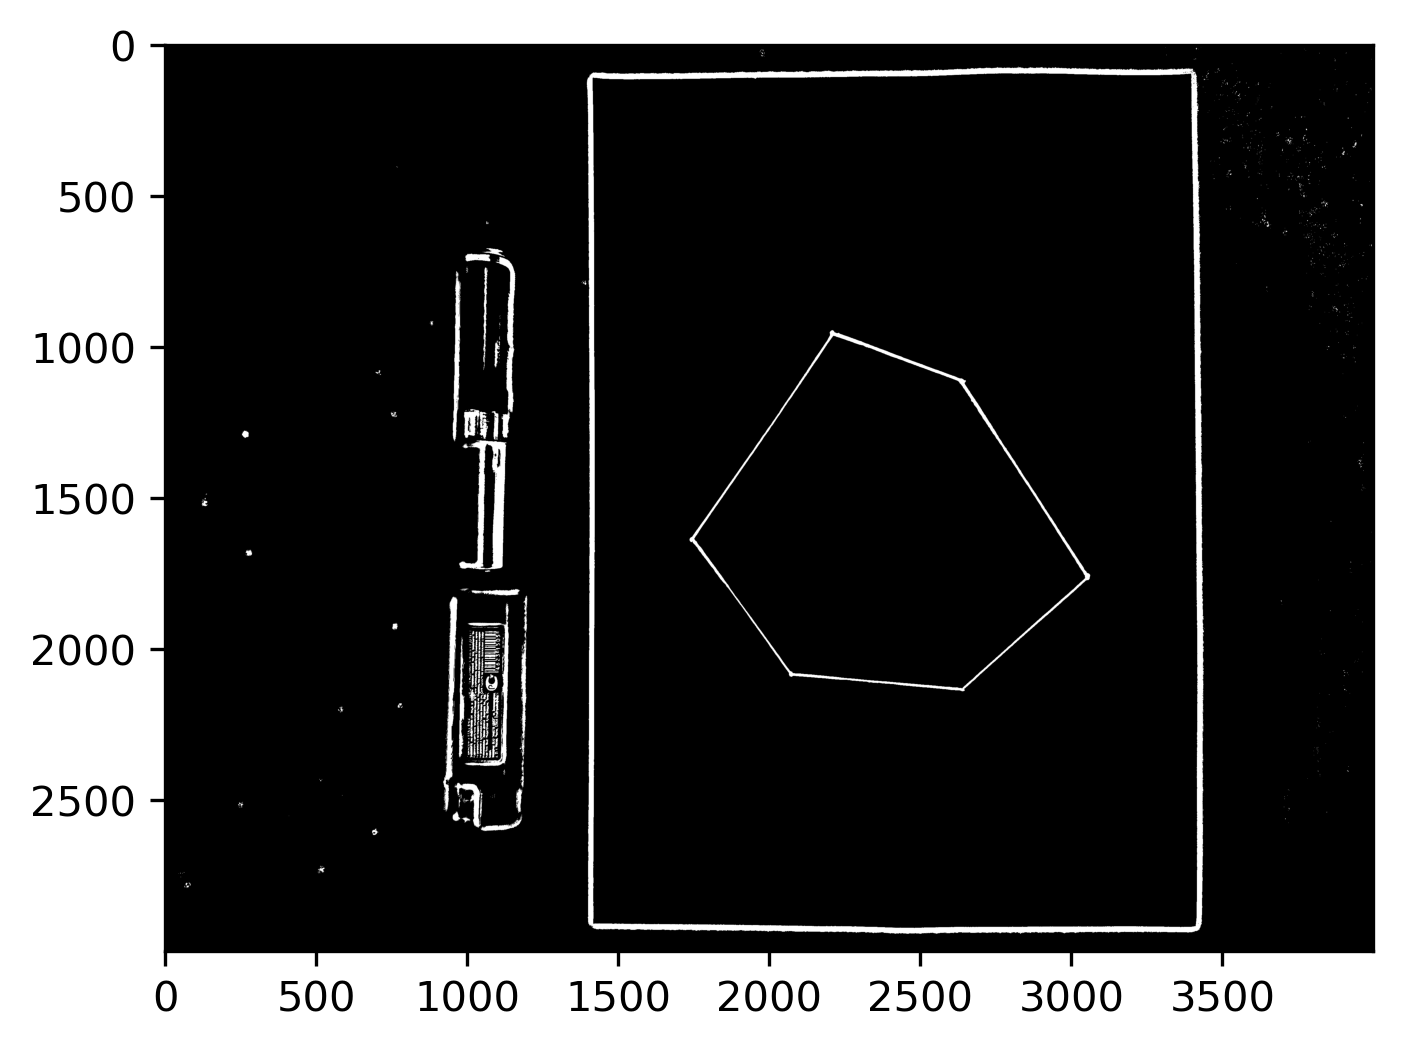

In [121]:
img_bin = Detector.getBinaryImage(img, True)

contours = Detector.getContours(img_bin, img_orig, True)

if contours == None:
    exit("Invalid contours")
else:
    paper_cont = contours[-1][0]
   
img1 = cv2.imread('output/Bin1.jpg')
plt.figure(dpi=300)
plt.imshow(img1)

Получение вершин белого листа. Нахождение левой границы листа. Деление изображение на два: с предметами и с белым листом:

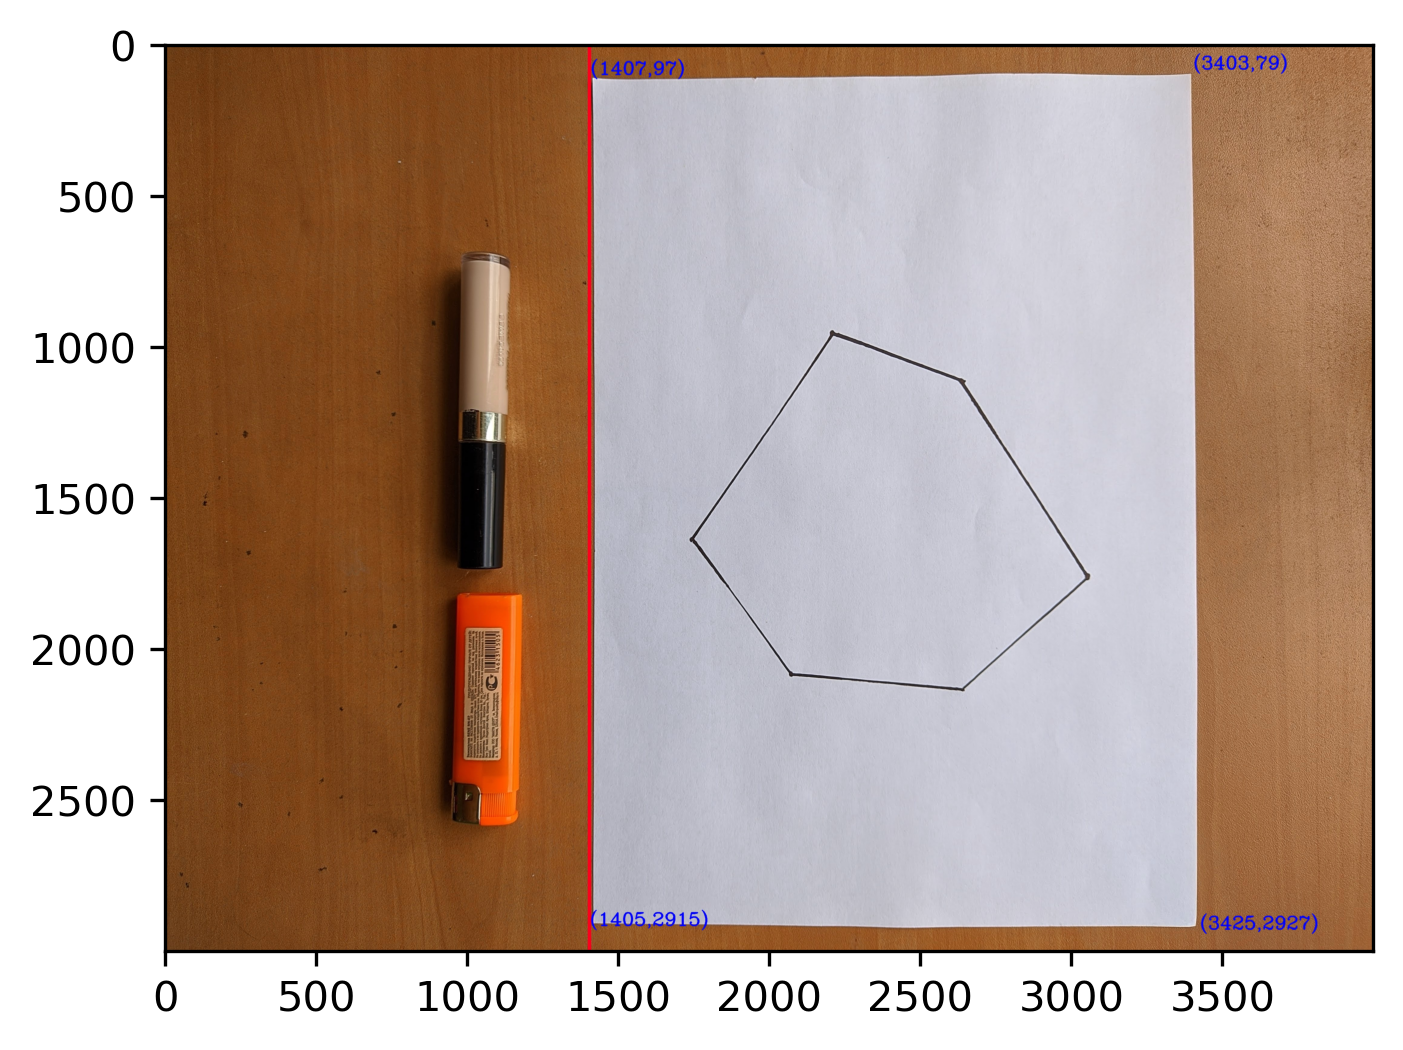

In [122]:
paper_vertex = Detector.getVertex(contours[-1][0], img_orig, True)
img_objects, img_paper = Detector.getBorderAndCut(paper_vertex, img_orig, img)

img1 = cv2.imread('output/Border.jpg')
plt.figure(dpi=300)
plt.imshow(img1)

Получение контуров на изображении с листом. Нахождение контура многоугольника. Проверка на количество вершин многоугольника:

In [123]:
contours = Detector.getContours(img_paper, img_paper, True)

poly_cont = contours[-1][0]
poly_vertex = Detector.getVertex(contours[-1][0], img_orig, False)

if len(poly_vertex) > 6:
    exit("Invalid number of vertices")

Сглаживание, бинаризация и морфологическое замыкание изображения с предметами. Нахождение контуров на изображении с предметами. Получение ограничивающего прямоугольника предметов:

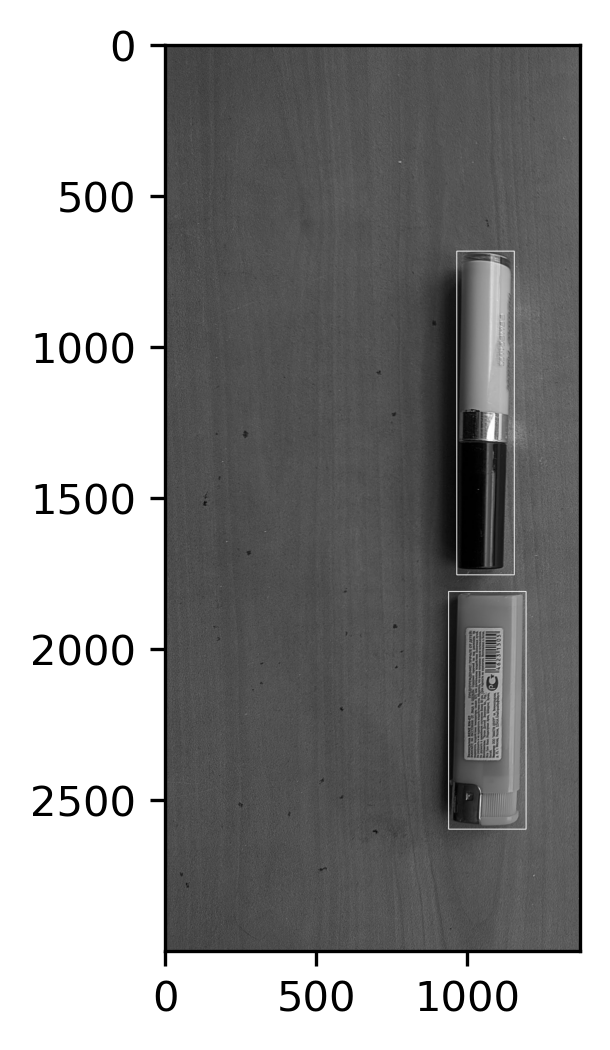

In [124]:
img_bin = Detector.getBinaryImage(img_objects, False)

contours = Detector.getContours(img_bin, img_objects, False)
objects_cont = contours[-1][0]

box = Detector.getBoundingBox(contours, img_objects)

img1 = cv2.imread('output/Contours.jpg')
plt.figure(dpi=300)
plt.imshow(img1)